# Twitter-Analyse for DHd-conference 2022 #
This project aims to analyse the tweets with the hashtag #DHd2022. This years conference has the title "Cultures of digital memory". As Twitter is nowadays producing millions of sources of individual actions, we have to ask ourselfs how does this influences our commemorative culture and what does it mean for culture of digital memory.

With this notebook I try to show what traces of action and interaction a single event like this conference leaves on Twitter and how we can analyse it.

In [1]:
from load_tweets import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)

In [2]:
"""
Connecting to the API-Client and downloading the tweets with #DHd2022.
"""
#api_client = connect_api('twitter_api.ini')
next_token = "start"
tweetsDHd = []
while next_token is not None and str(next_token) != '':
    next_token = None if next_token == "start" else next_token
    tmp = search_tweets('#DHd2022', next_token)
    if tmp is None:
        tweetsDHd = None
        break
    try:
        next_token = tmp["meta"]["next_token"]
    except KeyError:
        next_token = None
    print('Downloaded %s Tweets' % tmp["meta"]["result_count"])
    tweetsDHd.append(tmp)

#with open('data/tweets_DHd2022.json', 'w') as f:
#    json.dump(tweetsDHd, f)


Endpoint Response Code: 200
Downloaded 100 Tweets
Endpoint Response Code: 200
Downloaded 71 Tweets


In [3]:
try:
    tweets_data = pd.read_csv("data/tweets_data.csv", encoding='utf8', dtype={'id': str})
    tweets_user = pd.read_csv("data/twitter_users.csv", encoding='utf8', dtype={'id': str})
except FileNotFoundError:
    tweets_data = None
    tweets_user = None
if tweetsDHd is not None:
    for r in tweetsDHd:
        if tweets_data is None:
            tweets_data = pd.DataFrame(r["data"])
        else:
            tmp = pd.DataFrame(r["data"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_data['id'].tolist():
                    tweets_data = tweets_data.append(v)
                else: 
                    continue
        if tweets_user is None:
            tweets_user = pd.DataFrame(r["includes"]["users"])
        else:
            tmp = pd.DataFrame(r["includes"]["users"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_user['id'].tolist():
                    tweets_user = tweets_user.append(v)
        print(r["includes"].keys())
    tweets_data.to_csv("data/tweets_data.csv", encoding='utf8', index=False)
    tweets_user.to_csv("data/twitter_users.csv", encoding='utf8', index=False)


dict_keys(['users'])
dict_keys(['users'])


In [4]:
tweets_data

,entities,lang,author_id,source,public_metrics,in_reply_to_user_id,created_at,id,text,geo
0,"{'urls': [{'start': 87, 'end': 110, 'url': 'ht...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",810555350944464896.0,2022-02-23T10:46:13.000Z,1496436224738869250,immer noch anmelden. Bis zum 28.2. ist die Anm...,NaN
1,"{'hashtags': [{'start': 236, 'end': 244, 'tag'...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",810555350944464896.0,2022-02-23T10:46:12.000Z,1496436223291936772,unseren Gather-Raum. Auch das Kulturelle soll ...,NaN
2,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",en,911193053641273344,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23T10:41:32.000Z,1496435048454709249,RT @UWuttke: 📢 Thursday the one and only @etot...,NaN
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",de,1421172834,TweetDeck,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",NaN,2022-02-23T10:35:59.000Z,1496433653022437376,RT @UWuttke: Ich freue mich schon riesig auf d...,NaN
4,"{'hashtags': [{'start': 73, 'end': 81, 'tag': ...",de,391926702,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23T09:55:27.000Z,1496423448666587140,RT @msiemund: Vorm Schlafengehen noch ein klei...,NaN
...,...,...,...,...,...,...,...,...,...,...
12,"{'mentions': [{'start': 127, 'end': 135, 'user...",de,1341726401242816516,Twitter for iPhone,"{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,2022-03-18T11:18:35.000Z,1504779291048951809,🤩😍🎉 gerade angekommen: mein #dhd2022 #GatherCh...,NaN
13,"{'hashtags': [{'start': 252, 'end': 261, 'tag'...",en,629155988,Twitter Web App,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",629155988,2022-03-18T11:11:06.000Z,1504777408049733633,3/3 And the problem only increases with the nu...,NaN
14,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",de,402625250,TweetDeck,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",NaN,2022-03-18T08:20:04.000Z,1504734368962600965,RT @DominikBoenisch: Das Poster zu #Trainingth...,NaN
15,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",de,1493004805689724928,Twitter Web App,"{'retweet_count': 10, 'reply_count': 0, 'like_...",NaN,2022-03-18T00:27:48.000Z,1504615518766088199,RT @uclab_potsdam: Mehr Informationen zum Proj...,NaN


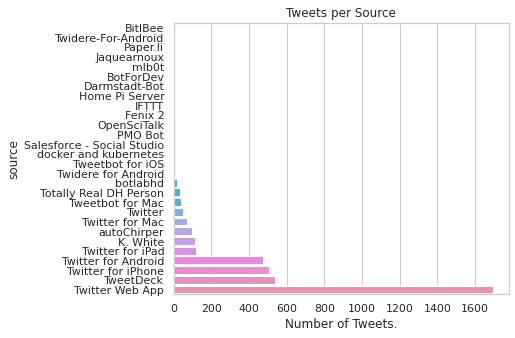

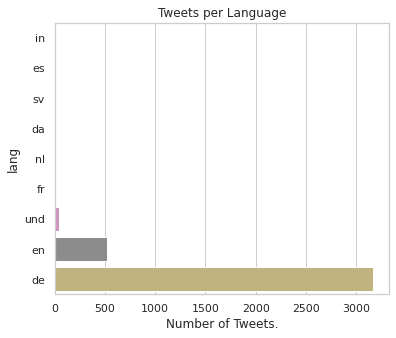

In [5]:
def bar_plot(value: str, df: pd.DataFrame, title: str, xlabel: str=""):
    """
    Creates a bar-plot by counting the occurrences of a given value.
    
    :param value: The value to plot.
    :param df: The Dataframe with the values.
    :param title: The title of the dataframe.
    :param xlable: The lable for the x-axe. Default: the name of the plotted value.
    """
    sns.barplot(data=tweets_data.groupby(by=value, as_index=False).count()[[value, "id"]].sort_values(by="id"), 
                y=value, x="id", orient='h')
    if xlabel != "":
        plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

bar_plot("source", tweets_data, "Tweets per Source", "Number of Tweets.")
bar_plot("lang", tweets_data, "Tweets per Language", "Number of Tweets.")

In [6]:
def str_to_dict(string_dict: str) -> dict:
    """
    Converts a string from type {'A': 0, 'B': 1, 'C': 2} into a dict object.
    
    :param string_dict: The string to convert.
    :return: The dictonary.
    """
    if type(string_dict) is dict:
        return string_dict
    values = string_dict.strip('{').strip('}').split(', ')
    output_dict = {}
    for v in values:
        v = v.split(': ')
        output_dict[v[0].strip("'")] = int(v[1])
    return output_dict


public_metrics_users = pd.DataFrame(list(map(str_to_dict, tweets_user["public_metrics"].tolist())))
public_metrics_users.loc[:10]

,followers_count,following_count,tweet_count,listed_count
0,16641,1170,64026,153
1,957,118,293,36
2,1670,965,8608,79
3,2158,1705,9376,90
4,1076,1928,18497,84
5,768,207,847,11
6,814,769,4188,20
7,424,462,174342,18
8,798,640,2523,28
9,123,109,200,0


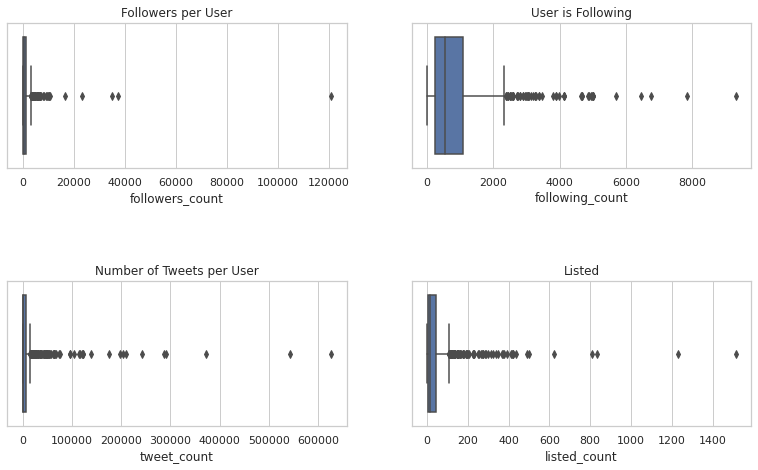

In [7]:
vis_users = []


plt.rcParams["figure.figsize"] = (12, 8)

fig, axes = plt.subplots(2,2)
sns.boxplot(data = public_metrics_users, x ="followers_count", orient="h", ax = axes[0][0])
sns.boxplot(data = public_metrics_users, x ="following_count", orient="h", ax = axes[0][1])
sns.boxplot(data = public_metrics_users, x ="tweet_count", orient="h", ax = axes[1][0])
sns.boxplot(data = public_metrics_users, x ="listed_count", orient="h", ax = axes[1][1])
axes[0][0].set_title("Followers per User")
axes[0][1].set_title("User is Following")
axes[1][0].set_title("Number of Tweets per User")
axes[1][1].set_title("Listed")
fig.tight_layout(pad=5)

plt.show()

In [9]:
print(tweets_data.shape)
len(set(tweets_data["id"].tolist()))

(3783, 10)


3783